In [1]:
# Importing tools for EDA.   
# Thank you for this quite an interesting prject to work on.  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind


# Importing input data.  
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 420)
df = pd.read_csv('~/Documents/Git/skillfactory/Unit2/datasheet/prj2_eda_stud_math.csv')

display(df.head(3))
df.info()

# Let`s see the columns names.  
df.columns

# Let`s rename some columns to a common pattern.  
df.columns = ['school', 'sex', 'age', 'addr', 'famsize', 'pstatus', 'medu',
              'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime',
              'studytime', 'failures', 'schoolsup', 'famsup', 'paidlessons',
              'activities', 'nursery', 'granular', 'wishhigher', 'internet',
              'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences',
              'score']

#Let`s see the results of columns renaming.  
display(df.head(3))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,addr,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paidlessons,activities,nursery,granular,wishhigher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

<AxesSubplot:>

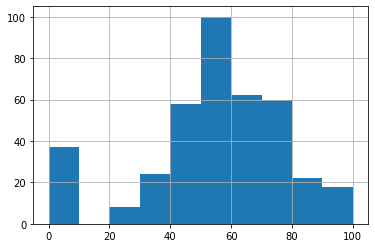

In [2]:
# Let`s see how does a score data looks like.  
display(df.score.describe())
display(df.score.hist())

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

<AxesSubplot:>

0-values counted: 37


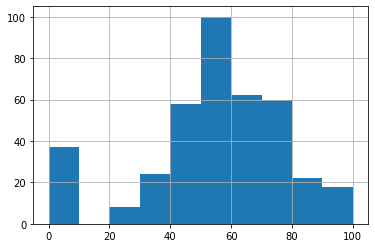

In [3]:
# The score column is our main reference point.  
# That`s why I will clean it first.  
# Forcing the values in the score column to numeric.  
df['score'] = pd.to_numeric(df['score'].astype(df['score'].dtype), 
                            errors='coerce')

# Cleaning it from NaN values.  
df.dropna(subset=['score'], axis=0, how='any', inplace=True)

# And checking score data once again.  
display(df.score.describe())
display(df.score.hist())

print("0-values counted:", df.score.loc[df.score==0].value_counts().sum())  

In [4]:
# I don`t know whether those 0-values across the score data
# are errors or not. But I will left all 37 zero results
# in the column.

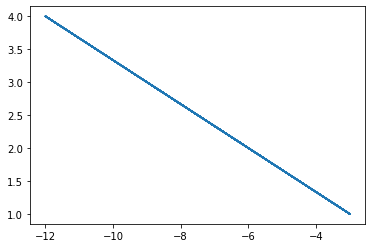

In [5]:
# Now let`s see what the data is in the granular column - I
# have no description for it.  
plt.plot(df.granular, df.studytime)

In [6]:
# The granular and studytime are totally identical.  
# I will drop granular column from the dataset.  
df.drop(['granular'], inplace=True, axis=1)

# Initial preparations are finished.  

# Making copy of df to preserve original data just in case.  
df_original = df.copy(deep=True)

In [7]:
# I will use the functions to get all the neccessary data
# for numeric datasets, column checks, corr tests.  

# And here I will keep the names of the automatically 
# detected interesting columns
columns_of_interest = []

# This function will provide me an easy access to all
# the data I will need for hist`s of numeric data.
def get_numeric_col_data(data):
    # Calculating quantiles, margins and IQR.  
    result = {}
    result['min'] = data.min()
    result['max'] = data.max()
    result['mean'] = data.mean()
    result['std'] = data.std()
    result['count'] = data.count()
    result['q25'] = data.quantile(0.25)
    result['q75'] = data.quantile(0.75)
    
    # IQR calculation.  
    result['iqr'] = result['q75']-result['q25']
    
    #  Lower margin for Outliers calculation.  
    result['m_0'] = result['q25']-1.5*result['iqr']
    
    #  Upper margin for Outliers calculation.  
    result['m_1'] = result['q25']+1.5*result['iqr']
    
    return result

def build_boxplot(col):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=col, y='score', data=df, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for '+col)
    plt.show()


# This function will help me to determine whether there are
# any statisticaly important diff`s in column data.  
def get_stat_diff(col, append_found=False):
    global columns_of_interest
    cols = df.loc[:,col].value_counts().index[:5]
    combs_all = list(combinations(cols,2))
    for comb in combs_all:
        ttest_result = ttest_ind(df.loc[df.loc[:, col] == comb[0], 'score'],
                                df.loc[df.loc[:, col] == comb[1], 'score']).pvalue
        
        if ttest_result <= 0.05/len(combs_all): 
            if append_found: columns_of_interest.append(col)
            print('Found statisticaly important diffs for column',
                  col,' at level',round(ttest_result,3),
                 '<=',
                  round(0.05/len(combs_all), 3))
            break
            
    return
           
            
# This function I will use to check all columns in the
# dataset.  
def check_column(col, inplace=False):
    global columns_of_interest
    print("\n\n---",col,"(",df[col].dtype,")---")
    display(df[col].describe())
    print("Null values:",df[col].isnull().values.sum())
    print("Unique values:",df[col].nunique())
    print("Total values in column: ",df[col].value_counts().sum())
    
    # If column datatype is Object.  
    if df[col].dtype == 'object':
        # Cleaning NaN and 'nan' (text) values.  
        df[col] = df[col].astype(str).apply(lambda x:None if x=='nan' else x)
        df[col] = df[col].astype(str).apply(lambda x:None if x.strip()=='' else x)

        # Don`t know why, but for now this is 
        # the only way to left only valid data in the dataset.  
        df[col] = df[col].loc[df[col]!='None']
        
        # Looking at stat diff
        get_stat_diff(col, True)
        
        # Building hist.  
        print(df[col].hist())
        
        # Building boxplot.  
        fig, ax = plt.subplots(figsize=(14, 4))
        sns.boxplot(x=col, y='score', data=df, ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for '+col)
        plt.show()
        # Ending this condition.  
        
    # If column datatype is Numeric.  
    elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
        # Forcing column data to numeric.  
        df[col] = pd.to_numeric(df[col].astype(df[col].dtype), errors='coerce')
        # Cleaning column data from NaN values.  
        df.dropna(subset=[col], axis=0, how='any', inplace=True)
        
        # Getting useful data for decision-making process.  
        ncd = get_numeric_col_data(df[col])
        
        print('\n Numeric Column Data:')
        print('25th percentile:{},'.format(ncd['q25']))
        print('75th pecentile:{}'.format(ncd['q75']))
        print('IQR:{}'.format(ncd['iqr']))
        print('Outlier margins: [{a},{b}]'.format(a=ncd['m_0'],
                                             b=ncd['m_1']))
            
        # Separate container for selected data for convinience.  
        result_set = df[col].loc[df[col].between(ncd['m_0'],ncd['m_1'])]
        
        #Counting the outliers. 
        outliers_count = df[col].value_counts().sum() \
                         - result_set.value_counts().sum()
        print('Outliers count:',outliers_count)
        
        # Building first hist.  
        result_set.hist(alpha=1.0, bins=16, range=(ncd['min'],ncd['max']),
                        label=col+': IQR')
        
        # Building second hist.  
        df[col].hist(alpha=0.5, bins=16, range=(ncd['min'],ncd['max']), 
                     label=col+': All Data')
        
        # Display the hist.  
        plt.legend()
        plt.grid()
        plt.show()
        
        corrcoef = np.corrcoef(df.score, df[col])
        
        # If the corrcoef >= 5% than I will closely check this column.  
        if abs(corrcoef[0,1]) >= 0.05: columns_of_interest.append(col)
        
        # Printing corrcoef value.  
        print("Checking for correlation:", round(corrcoef[0,1],3))
        
        # Ending this condition.  
        
    else:
        print("UNKNOWN DATATYPE FOR COL",col)
        # Ending IF
    
    # Useful info.  
    print("Null values:",df[col].isnull().values.sum())
    print("Unique values:",df[col].nunique())
    print("Total values in column: ",df[col].value_counts().sum())
    print("Valid values left:")
    print(df[col].value_counts())
    
    return



--- school ( object )---


count     389
unique      2
top        GP
freq      344
Name: school, dtype: object

Null values: 0
Unique values: 2
Total values in column:  389
AxesSubplot(0.125,0.125;0.775x0.755)


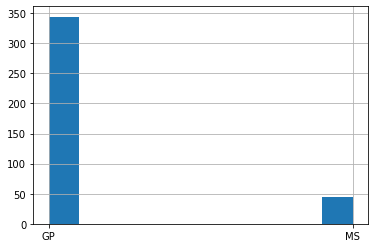

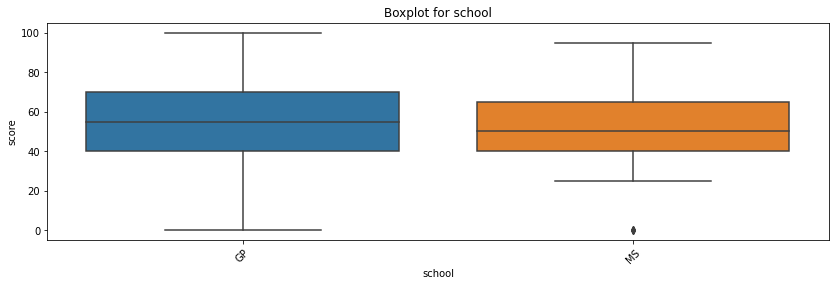

Null values: 0
Unique values: 2
Total values in column:  389
Valid values left:
GP    344
MS     45
Name: school, dtype: int64


--- sex ( object )---


count     389
unique      2
top         F
freq      204
Name: sex, dtype: object

Null values: 0
Unique values: 2
Total values in column:  389
AxesSubplot(0.125,0.125;0.775x0.755)


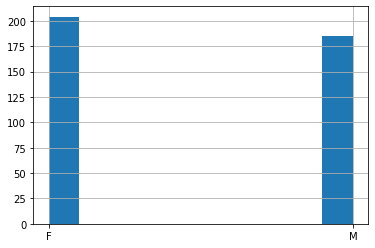

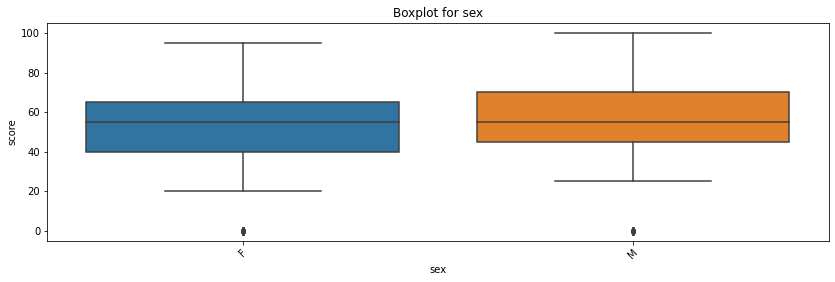

Null values: 0
Unique values: 2
Total values in column:  389
Valid values left:
F    204
M    185
Name: sex, dtype: int64


--- age ( int64 )---


count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Null values: 0
Unique values: 8
Total values in column:  389

 Numeric Column Data:
25th percentile:16.0,
75th pecentile:18.0
IQR:2.0
Outlier margins: [13.0,19.0]
Outliers count: 5


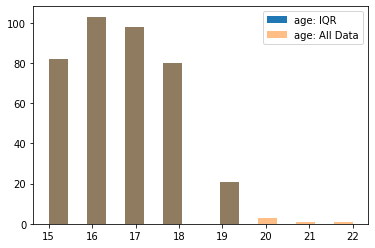

Checking for correlation: -0.156
Null values: 0
Unique values: 8
Total values in column:  389
Valid values left:
16    103
17     98
15     82
18     80
19     21
20      3
21      1
22      1
Name: age, dtype: int64


--- addr ( object )---


count     374
unique      2
top         U
freq      291
Name: addr, dtype: object

Null values: 15
Unique values: 2
Total values in column:  374
Found statisticaly important diffs for column addr  at level 0.02 <= 0.05
AxesSubplot(0.125,0.125;0.775x0.755)


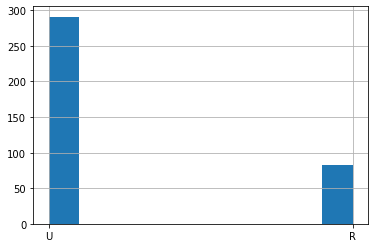

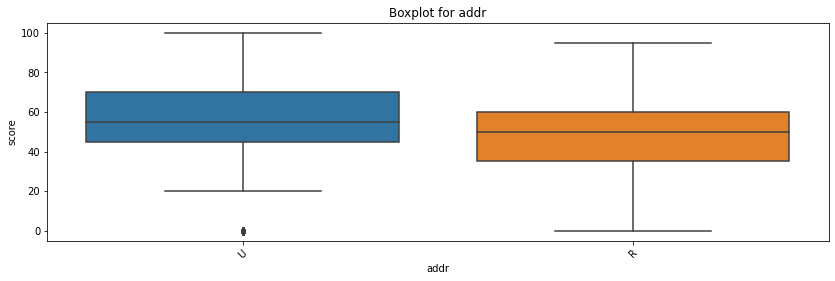

Null values: 15
Unique values: 2
Total values in column:  374
Valid values left:
U    291
R     83
Name: addr, dtype: int64


--- famsize ( object )---


count     362
unique      2
top       GT3
freq      255
Name: famsize, dtype: object

Null values: 27
Unique values: 2
Total values in column:  362
AxesSubplot(0.125,0.125;0.775x0.755)


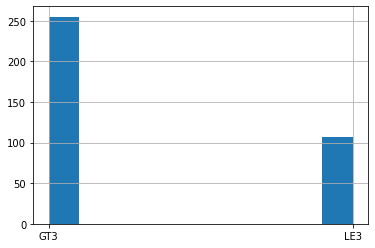

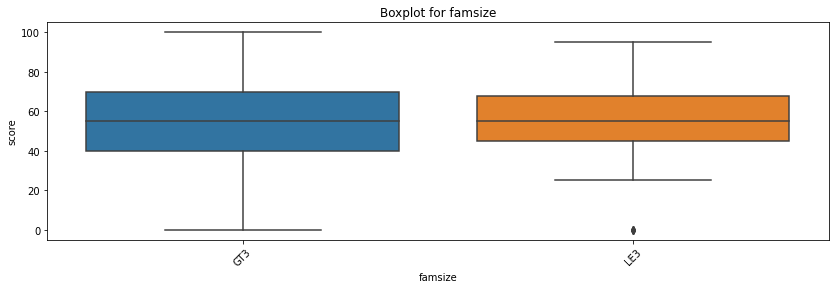

Null values: 27
Unique values: 2
Total values in column:  362
Valid values left:
GT3    255
LE3    107
Name: famsize, dtype: int64


--- pstatus ( object )---


count     344
unique      2
top         T
freq      308
Name: pstatus, dtype: object

Null values: 45
Unique values: 2
Total values in column:  344
AxesSubplot(0.125,0.125;0.775x0.755)


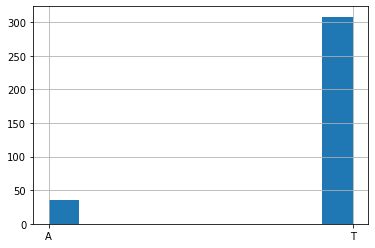

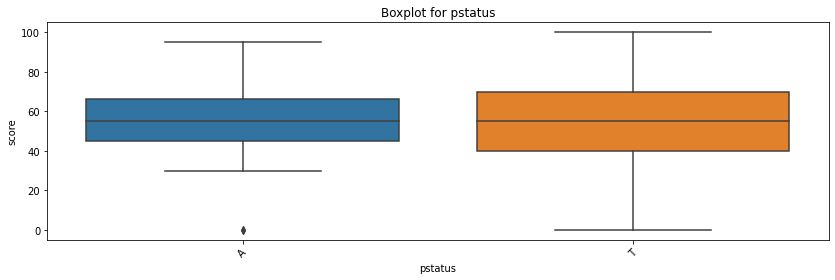

Null values: 45
Unique values: 2
Total values in column:  344
Valid values left:
T    308
A     36
Name: pstatus, dtype: int64


--- medu ( float64 )---


count    386.000000
mean       2.766839
std        1.094277
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

Null values: 3
Unique values: 5
Total values in column:  386

 Numeric Column Data:
25th percentile:2.0,
75th pecentile:4.0
IQR:2.0
Outlier margins: [-1.0,5.0]
Outliers count: 0


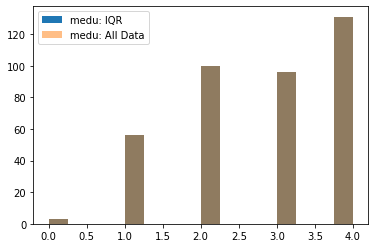

Checking for correlation: 0.213
Null values: 0
Unique values: 5
Total values in column:  386
Valid values left:
4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
Name: medu, dtype: int64


--- fedu ( float64 )---


count    362.000000
mean       2.632597
std        2.249121
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

Null values: 24
Unique values: 6
Total values in column:  362

 Numeric Column Data:
25th percentile:2.0,
75th pecentile:3.0
IQR:1.0
Outlier margins: [0.5,3.5]
Outliers count: 91


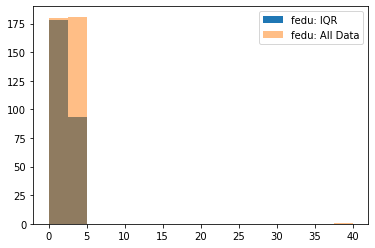

Checking for correlation: 0.076
Null values: 0
Unique values: 6
Total values in column:  362
Valid values left:
2.0     104
3.0      93
4.0      88
1.0      74
0.0       2
40.0      1
Name: fedu, dtype: int64


--- mjob ( object )---


count       343
unique        5
top       other
freq        117
Name: mjob, dtype: object

Null values: 19
Unique values: 5
Total values in column:  343
Found statisticaly important diffs for column mjob  at level 0.005 <= 0.005
AxesSubplot(0.125,0.125;0.775x0.755)


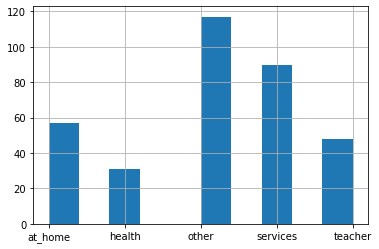

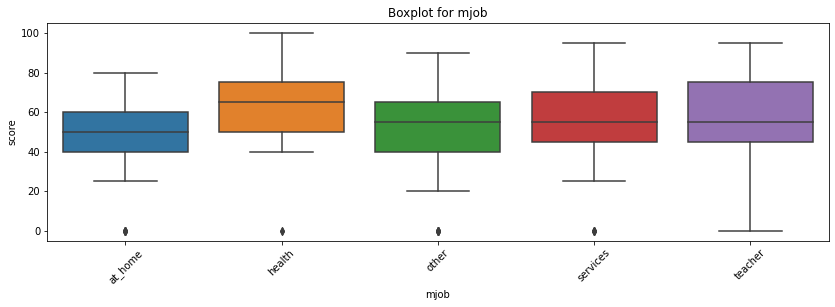

Null values: 19
Unique values: 5
Total values in column:  343
Valid values left:
other       117
services     90
at_home      57
teacher      48
health       31
Name: mjob, dtype: int64


--- fjob ( object )---


count       328
unique        5
top       other
freq        186
Name: fjob, dtype: object

Null values: 34
Unique values: 5
Total values in column:  328
AxesSubplot(0.125,0.125;0.775x0.755)


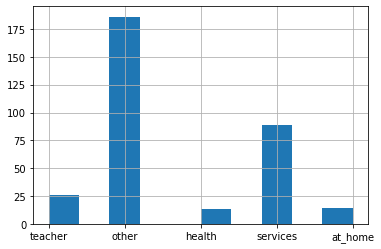

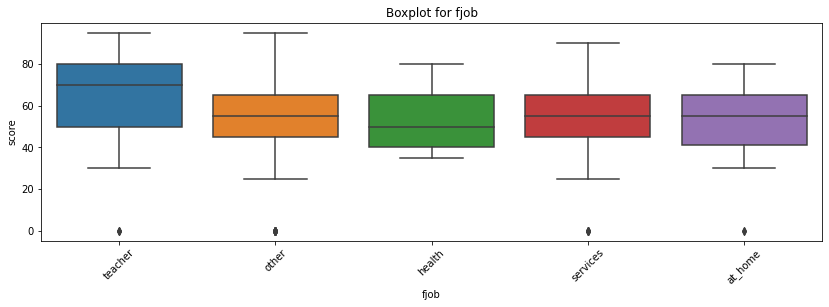

Null values: 34
Unique values: 5
Total values in column:  328
Valid values left:
other       186
services     89
teacher      26
at_home      14
health       13
Name: fjob, dtype: int64


--- reason ( object )---


count        346
unique         4
top       course
freq         126
Name: reason, dtype: object

Null values: 16
Unique values: 4
Total values in column:  346
AxesSubplot(0.125,0.125;0.775x0.755)


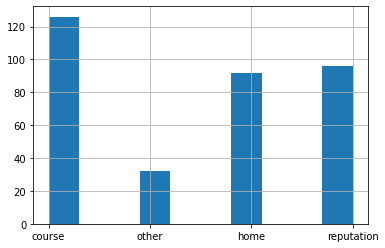

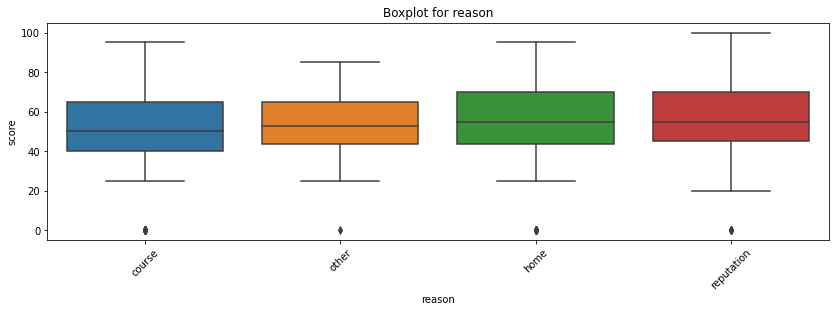

Null values: 16
Unique values: 4
Total values in column:  346
Valid values left:
course        126
reputation     96
home           92
other          32
Name: reason, dtype: int64


--- guardian ( object )---


count        332
unique         3
top       mother
freq         233
Name: guardian, dtype: object

Null values: 30
Unique values: 3
Total values in column:  332
AxesSubplot(0.125,0.125;0.775x0.755)


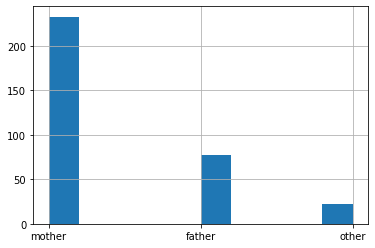

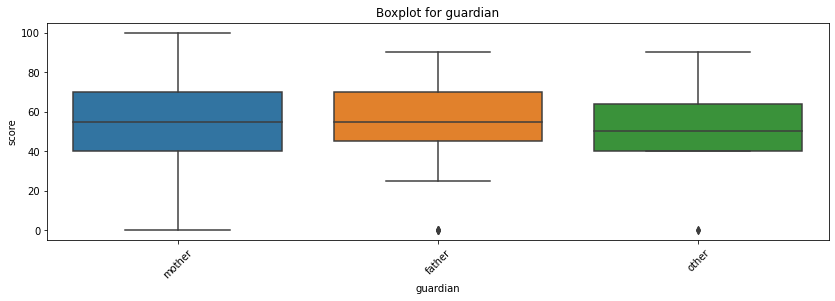

Null values: 30
Unique values: 3
Total values in column:  332
Valid values left:
mother    233
father     77
other      22
Name: guardian, dtype: int64


--- traveltime ( float64 )---


count    337.000000
mean       1.454006
std        0.706132
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

Null values: 25
Unique values: 4
Total values in column:  337

 Numeric Column Data:
25th percentile:1.0,
75th pecentile:2.0
IQR:1.0
Outlier margins: [-0.5,2.5]
Outliers count: 28


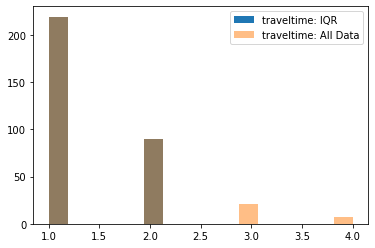

Checking for correlation: -0.078
Null values: 0
Unique values: 4
Total values in column:  337
Valid values left:
1.0    219
2.0     90
3.0     21
4.0      7
Name: traveltime, dtype: int64


--- studytime ( float64 )---


count    331.000000
mean       2.033233
std        0.853929
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

Null values: 6
Unique values: 4
Total values in column:  331

 Numeric Column Data:
25th percentile:1.0,
75th pecentile:2.0
IQR:1.0
Outlier margins: [-0.5,2.5]
Outliers count: 78


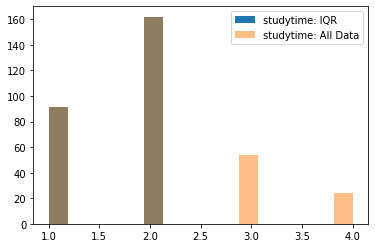

Checking for correlation: 0.11
Null values: 0
Unique values: 4
Total values in column:  331
Valid values left:
2.0    162
1.0     91
3.0     54
4.0     24
Name: studytime, dtype: int64


--- failures ( float64 )---


count    315.000000
mean       0.320635
std        0.732798
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

Null values: 16
Unique values: 4
Total values in column:  315

 Numeric Column Data:
25th percentile:0.0,
75th pecentile:0.0
IQR:0.0
Outlier margins: [0.0,0.0]
Outliers count: 64


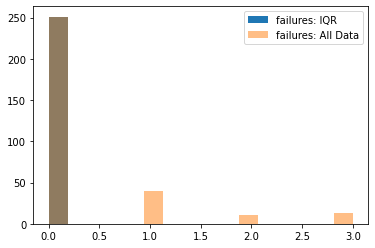

Checking for correlation: -0.341
Null values: 0
Unique values: 4
Total values in column:  315
Valid values left:
0.0    251
1.0     40
3.0     13
2.0     11
Name: failures, dtype: int64


--- schoolsup ( object )---


count     307
unique      2
top        no
freq      267
Name: schoolsup, dtype: object

Null values: 8
Unique values: 2
Total values in column:  307
AxesSubplot(0.125,0.125;0.775x0.755)


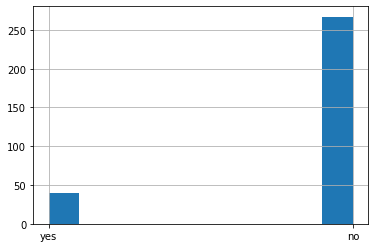

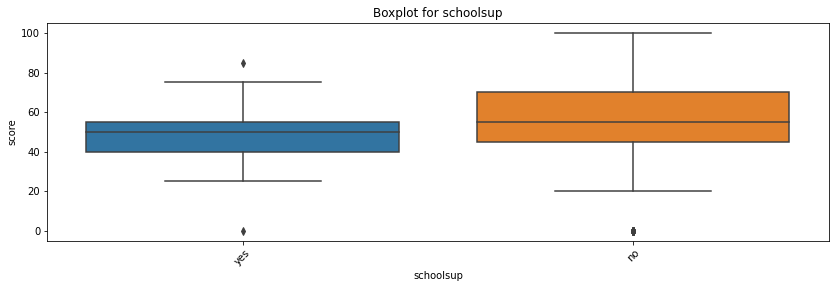

Null values: 8
Unique values: 2
Total values in column:  307
Valid values left:
no     267
yes     40
Name: schoolsup, dtype: int64


--- famsup ( object )---


count     286
unique      2
top       yes
freq      173
Name: famsup, dtype: object

Null values: 29
Unique values: 2
Total values in column:  286
AxesSubplot(0.125,0.125;0.775x0.755)


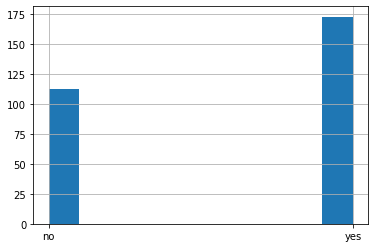

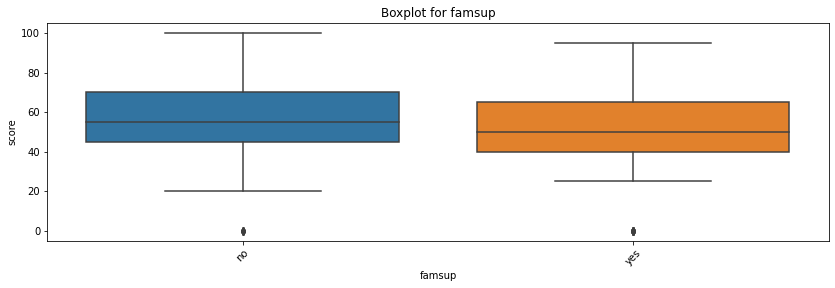

Null values: 29
Unique values: 2
Total values in column:  286
Valid values left:
yes    173
no     113
Name: famsup, dtype: int64


--- paidlessons ( object )---


count     285
unique      2
top        no
freq      161
Name: paidlessons, dtype: object

Null values: 30
Unique values: 2
Total values in column:  285
AxesSubplot(0.125,0.125;0.775x0.755)


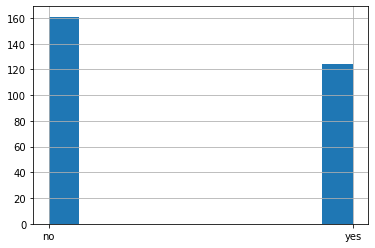

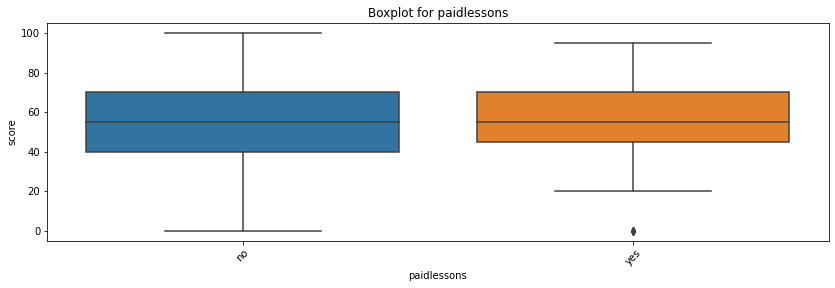

Null values: 30
Unique values: 2
Total values in column:  285
Valid values left:
no     161
yes    124
Name: paidlessons, dtype: int64


--- activities ( object )---


count     303
unique      2
top       yes
freq      155
Name: activities, dtype: object

Null values: 12
Unique values: 2
Total values in column:  303
AxesSubplot(0.125,0.125;0.775x0.755)


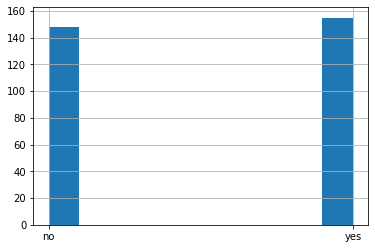

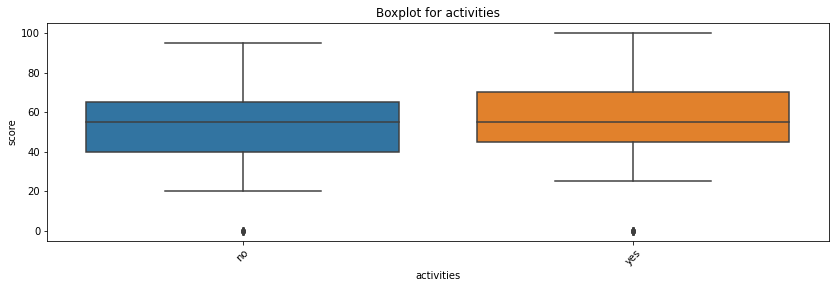

Null values: 12
Unique values: 2
Total values in column:  303
Valid values left:
yes    155
no     148
Name: activities, dtype: int64


--- nursery ( object )---


count     300
unique      2
top       yes
freq      238
Name: nursery, dtype: object

Null values: 15
Unique values: 2
Total values in column:  300
AxesSubplot(0.125,0.125;0.775x0.755)


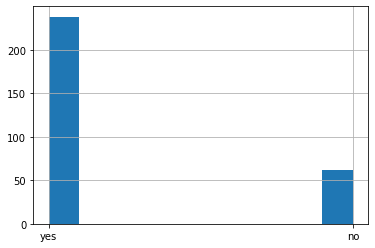

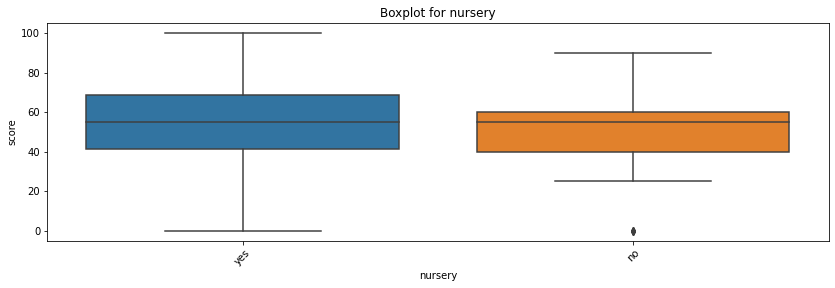

Null values: 15
Unique values: 2
Total values in column:  300
Valid values left:
yes    238
no      62
Name: nursery, dtype: int64


--- wishhigher ( object )---


count     303
unique      2
top       yes
freq      287
Name: wishhigher, dtype: object

Null values: 12
Unique values: 2
Total values in column:  303
Found statisticaly important diffs for column wishhigher  at level 0.028 <= 0.05
AxesSubplot(0.125,0.125;0.775x0.755)


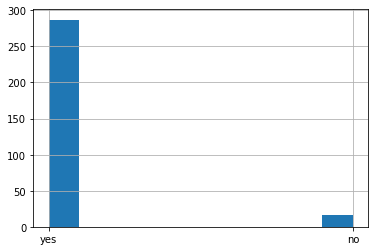

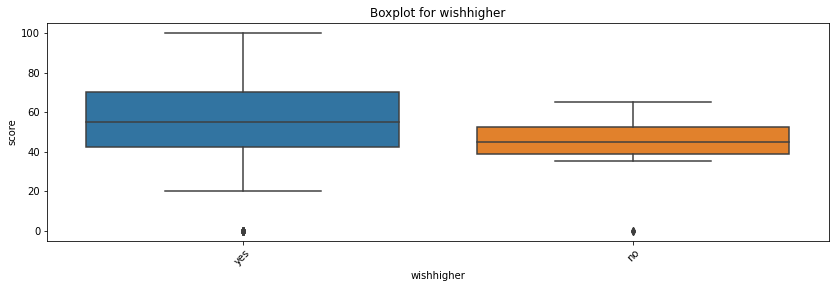

Null values: 12
Unique values: 2
Total values in column:  303
Valid values left:
yes    287
no      16
Name: wishhigher, dtype: int64


--- internet ( object )---


count     289
unique      2
top       yes
freq      246
Name: internet, dtype: object

Null values: 26
Unique values: 2
Total values in column:  289
AxesSubplot(0.125,0.125;0.775x0.755)


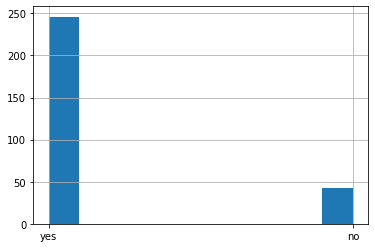

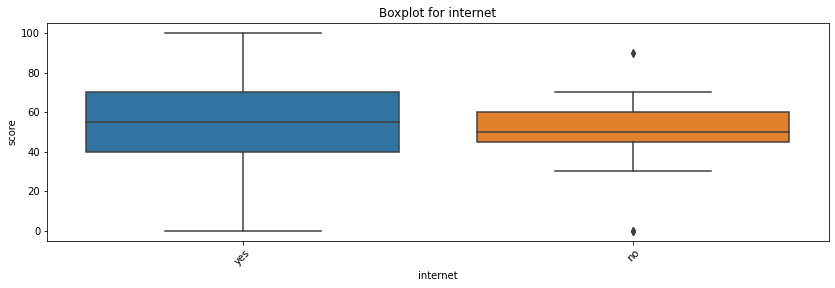

Null values: 26
Unique values: 2
Total values in column:  289
Valid values left:
yes    246
no      43
Name: internet, dtype: int64


--- romantic ( object )---


count     296
unique      2
top        no
freq      194
Name: romantic, dtype: object

Null values: 19
Unique values: 2
Total values in column:  296
AxesSubplot(0.125,0.125;0.775x0.755)


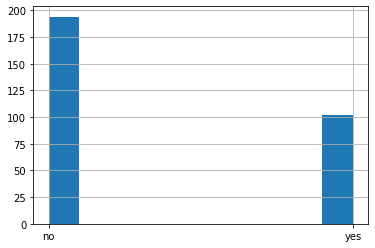

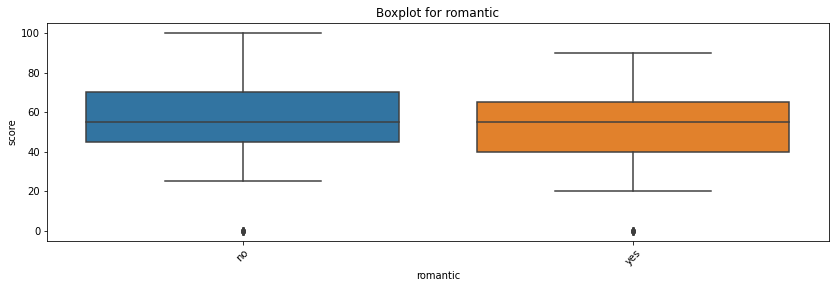

Null values: 19
Unique values: 2
Total values in column:  296
Valid values left:
no     194
yes    102
Name: romantic, dtype: int64


--- famrel ( float64 )---


count    293.000000
mean       3.907850
std        0.926238
min       -1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

Null values: 22
Unique values: 6
Total values in column:  293

 Numeric Column Data:
25th percentile:4.0,
75th pecentile:4.0
IQR:0.0
Outlier margins: [4.0,4.0]
Outliers count: 144


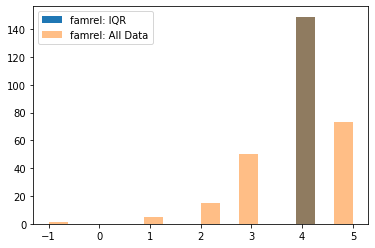

Checking for correlation: 0.027
Null values: 0
Unique values: 6
Total values in column:  293
Valid values left:
 4.0    149
 5.0     73
 3.0     50
 2.0     15
 1.0      5
-1.0      1
Name: famrel, dtype: int64


--- freetime ( float64 )---


count    287.000000
mean       3.205575
std        0.994515
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

Null values: 6
Unique values: 5
Total values in column:  287

 Numeric Column Data:
25th percentile:3.0,
75th pecentile:4.0
IQR:1.0
Outlier margins: [1.5,4.5]
Outliers count: 41


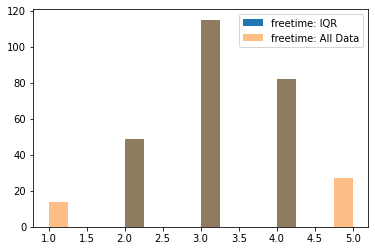

Checking for correlation: 0.033
Null values: 0
Unique values: 5
Total values in column:  287
Valid values left:
3.0    115
4.0     82
2.0     49
5.0     27
1.0     14
Name: freetime, dtype: int64


--- goout ( float64 )---


count    282.000000
mean       3.109929
std        1.086298
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

Null values: 5
Unique values: 5
Total values in column:  282

 Numeric Column Data:
25th percentile:2.0,
75th pecentile:4.0
IQR:2.0
Outlier margins: [-1.0,5.0]
Outliers count: 0


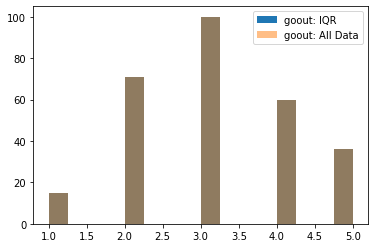

Checking for correlation: -0.174
Null values: 0
Unique values: 5
Total values in column:  282
Valid values left:
3.0    100
2.0     71
4.0     60
5.0     36
1.0     15
Name: goout, dtype: int64


--- health ( float64 )---


count    272.000000
mean       3.430147
std        1.380776
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

Null values: 10
Unique values: 5
Total values in column:  272

 Numeric Column Data:
25th percentile:2.0,
75th pecentile:5.0
IQR:3.0
Outlier margins: [-2.5,6.5]
Outliers count: 0


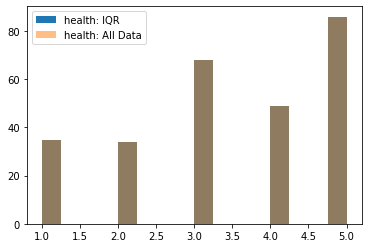

Checking for correlation: -0.052
Null values: 0
Unique values: 5
Total values in column:  272
Valid values left:
5.0    86
3.0    68
4.0    49
1.0    35
2.0    34
Name: health, dtype: int64


--- absences ( float64 )---


count    263.000000
mean       7.741445
std       27.539452
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Null values: 9
Unique values: 30
Total values in column:  263

 Numeric Column Data:
25th percentile:0.0,
75th pecentile:8.0
IQR:8.0
Outlier margins: [-12.0,12.0]
Outliers count: 35


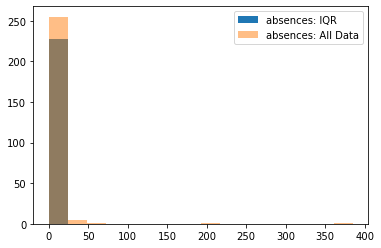

Checking for correlation: 0.082
Null values: 0
Unique values: 30
Total values in column:  263
Valid values left:
0.0      77
4.0      41
2.0      38
6.0      19
8.0      16
10.0     12
12.0      8
14.0      8
16.0      7
3.0       6
5.0       4
7.0       3
1.0       2
22.0      2
9.0       2
18.0      2
15.0      2
20.0      2
28.0      1
38.0      1
212.0     1
21.0      1
40.0      1
26.0      1
13.0      1
385.0     1
25.0      1
24.0      1
56.0      1
17.0      1
Name: absences, dtype: int64


--- score ( float64 )---


count    263.000000
mean      52.110266
std       21.956220
min        0.000000
25%       42.500000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

Null values: 0
Unique values: 18
Total values in column:  263

 Numeric Column Data:
25th percentile:42.5,
75th pecentile:65.0
IQR:22.5
Outlier margins: [8.75,76.25]
Outliers count: 46


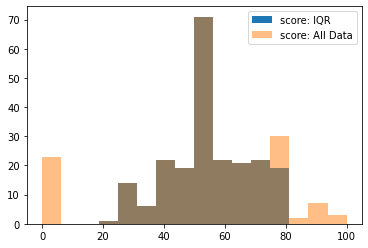

Checking for correlation: 1.0
Null values: 0
Unique values: 18
Total values in column:  263
Valid values left:
50.0     37
55.0     34
0.0      23
70.0     22
60.0     22
40.0     22
65.0     21
45.0     19
75.0     19
80.0     11
30.0     10
90.0      7
35.0      6
25.0      4
95.0      2
85.0      2
20.0      1
100.0     1
Name: score, dtype: int64


In [8]:
for col in df.columns:
    check_column(col)

In [9]:
# Display the columns that we found interesting.   
i=0
for col in columns_of_interest:
    i+=1
    print('{a}. {b} ({c})'.format(a=i,b=col,c=df[col].dtype))

1. age (int64)
2. addr (object)
3. medu (float64)
4. fedu (float64)
5. mjob (object)
6. traveltime (float64)
7. studytime (float64)
8. failures (float64)
9. wishhigher (object)
10. goout (float64)
11. health (float64)
12. absences (float64)
13. score (float64)


In [10]:
# Let`s walk through the data manualy.  
# We will check all the columns from the list
# one-by-one.  

# The first one is age.
col = 'age'

print('- Checking',col,'data of type',df[col].dtype,'...')
print(df[col].describe())
#print(df[col].hist())
ncd = get_numeric_col_data(df[col])

# Checking for correlation coeficient.  
corrcoef = np.corrcoef(df.loc[df[col].between(ncd['m_0'],ncd['m_1'])]['score'],
                       df.loc[df[col].between(ncd['m_0'],ncd['m_1'])][col]
                      )

print('- Checking for correlation:', round(corrcoef[0,1],3))
print('- For column',col,'we can see an inverse correlation.')
print('- The older ones gets - the lower score he gets! Joke.')

# Checking for correlation coeficient for students 
# younger than 19 y.o.  
corrcoef = np.corrcoef(df.loc[df[col].between(ncd['m_0'],18)]['score'],
                       df.loc[df[col].between(ncd['m_0'],18)][col]
                      )

print('- Checking for correlation for students',
      'younger than 19yo:', round(corrcoef[0,1],3))
print('- We still have a correlation but a little bit weaker.')
print('- Hypothesis: those who are learning at school',
     'at the age > 15 objectively get lower scores.')

- Checking age data of type int64 ...
count    263.000000
mean      16.730038
std        1.295666
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
- Checking for correlation: -0.162
- For column age we can see an inverse correlation.
- The older ones gets - the lower score he gets! Joke.
- Checking for correlation for students younger than 19yo: -0.117
- We still have a correlation but a little bit weaker.
- Hypothesis: those who are learning at school at the age > 15 objectively get lower scores.


- Checking addr data of type object ...
count     255
unique      2
top         U
freq      202
Name: addr, dtype: object


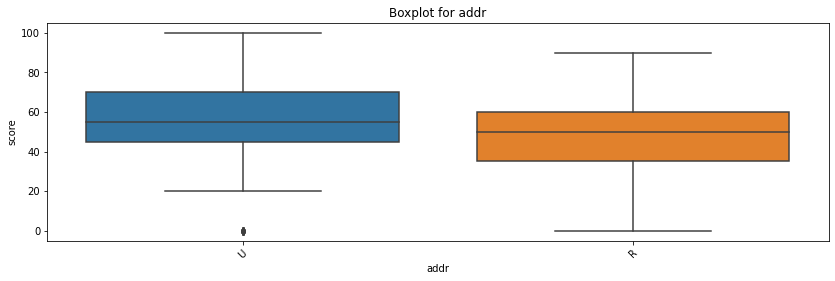

None
- Checking for stat diff message:
Found statisticaly important diffs for column addr  at level 0.035 <= 0.05
None
- Hypothesis: We can see that the students living in the urban area tend to have a higher scores.


In [11]:
# The next one is addr - addres or living area. 
col = 'addr'

print('- Checking',col,'data of type',df[col].dtype,'...')
print(df[col].describe())
#print(df[col].hist())

print(build_boxplot(col))

print('- Checking for stat diff message:', )
print(get_stat_diff(col))

print('- Hypothesis: We can see that the students living in the',
      'urban area tend to have a higher scores.')

- Checking medu data of type float64 ...
count    263.000000
mean       2.806084
std        1.086191
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64
- Checking how many medu value is 0
- Maybe this is some kind of mistake or corrupted data?
- Min value count: 3
- No. There is only 3 zero values. I think it is ok.


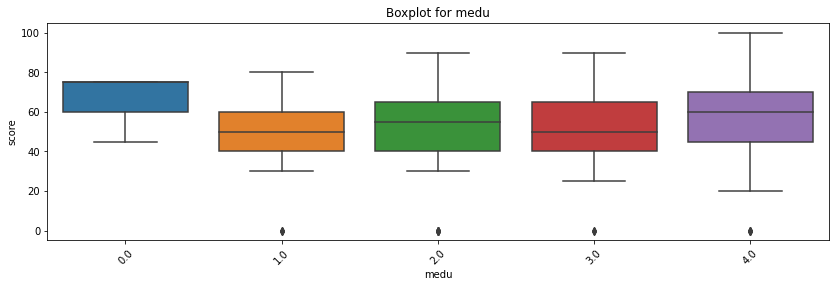

- Checking for correlation: 0.16
- For column medu we can see a slight direct correlation.
- Hypothesis: the higher mother`s education the higher scores her kid gets!


In [12]:
# The next one is medu - mother education.
col = 'medu'

print('- Checking',col,'data of type',df[col].dtype,'...')
print(df[col].describe())

print('- Checking how many medu value is 0')
print('- Maybe this is some kind of mistake or corrupted data?')
print('- Min value count:',
      df[col].loc[df[col]==df[col].min()].value_counts().sum())
print('- No. There is only 3 zero values. I think it is ok.')
#print(df[col].hist())

build_boxplot(col)

ncd = get_numeric_col_data(df[col])

# Checking for correlation coeficient
corrcoef = np.corrcoef(df.loc[df[col].between(ncd['m_0'],ncd['m_1'])]['score'],
                       df.loc[df[col].between(ncd['m_0'],ncd['m_1'])][col]
                      )

print('- Checking for correlation:', round(corrcoef[0,1],3))
print('- For column',col,'we can see a slight direct correlation.')
print('- Hypothesis: the higher mother`s education',
      'the higher scores her kid gets!')

- Checking fedu data of type float64 ...
count    263.000000
mean       2.714829
std        2.545474
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       40.000000
Name: fedu, dtype: float64
- I know that fedu value lays between 0 and 4.
- I see here a value of 40. Possible input mistake.
- I will remove that row now.
- Now that row is removed
AxesSubplot(0.125,0.125;0.775x0.755)


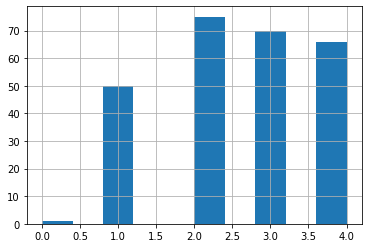

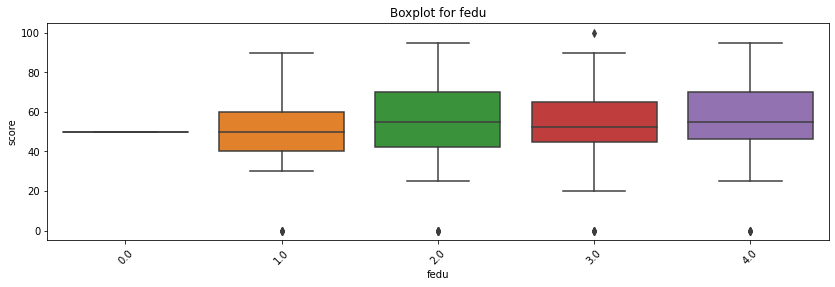

None
- Checking for correlation: 0.083
- For column fedu we can see a week direct correlation.
- Hypothesis: the higher father`s education the higher scores his kid gets!


In [13]:
# The next one is fedu - Father`s education. 
col = 'fedu'

print('- Checking',col,'data of type',df[col].dtype,'...')
print(df[col].describe())


print('- I know that fedu value lays between 0 and 4.')
print('- I see here a value of 40. Possible input mistake.')
print('- I will remove that row now.')

# Removing row(s) with abnormal values.  
df.drop(df.loc[df['fedu']>4].index, inplace=True)

print('- Now that row is removed')
print(df[col].hist())

print(build_boxplot(col))

ncd = get_numeric_col_data(df[col])

# Checking for correlation coeficient
corrcoef = np.corrcoef(df.loc[df[col].between(ncd['m_0'],ncd['m_1'])]['score'],
                       df.loc[df[col].between(ncd['m_0'],ncd['m_1'])][col]
                      )

print('- Checking for correlation:', round(corrcoef[0,1],3))
print('- For column',col,'we can see a week direct correlation.')

print('- Hypothesis: the higher father`s education',
      'the higher scores his kid gets!')


- Checking mjob data of type object ...
count       252
unique        5
top       other
freq         88
Name: mjob, dtype: object
AxesSubplot(0.125,0.125;0.775x0.755)


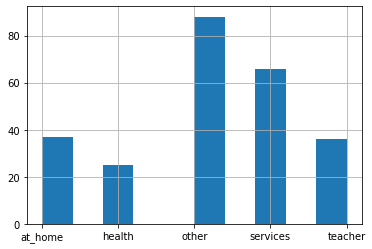

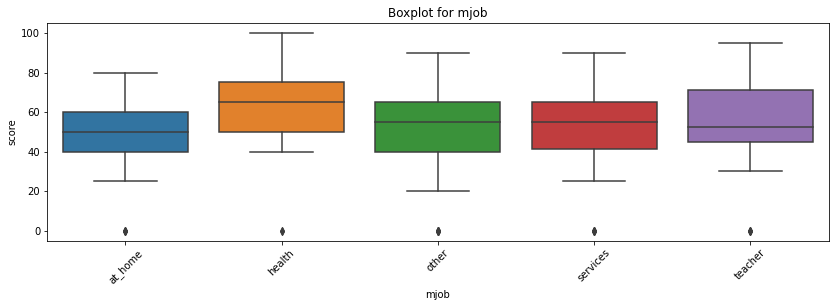

None
- Checking for stat diff message:
None
- From the bar graph we can see that kids of motherth working in healthcare tend to have higher scores.
- But I can`t get a reliable data to prove it.
- Excluding mjob column from the list.


In [20]:
# The next one is mjob - Mother`s job. 
col = 'mjob'

print('- Checking',col,'data of type',df[col].dtype,'...')
print(df[col].describe())
print(df[col].hist())

print(build_boxplot(col))

print('- Checking for stat diff message:', )
print(get_stat_diff(col))

print('- From the bar graph we can see that',
     'kids of motherth working in healthcare',
     'tend to have higher scores.')
print('- But I can`t get a reliable data to prove it.')
print('- Excluding mjob column from the list.')

- Checking wishhigher data of type object ...
count     251
unique      2
top       yes
freq      240
Name: wishhigher, dtype: object
AxesSubplot(0.125,0.125;0.775x0.755)


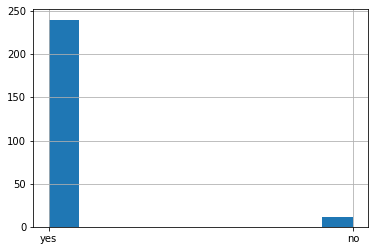

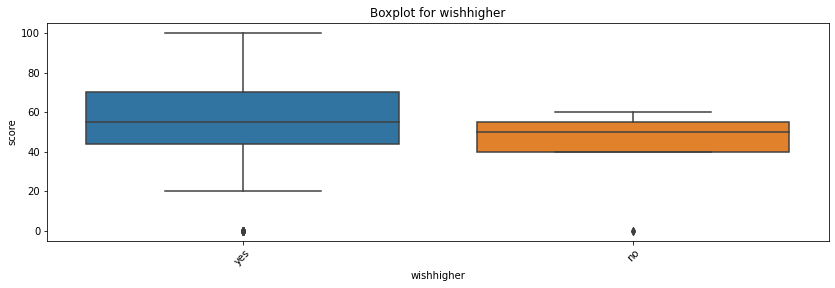

None
- Checking for stat diff message:
None
- Almost all kids want to get a higher education.
- But this data don`t look much reliable.
- Excluding wishhigher column from the list.


In [24]:
# The next one is wishhigher - does a student
# wants to get a higher education.  
col = 'wishhigher'

print('- Checking',col,'data of type',df[col].dtype,'...')
print(df[col].describe())
print(df[col].hist())

print(build_boxplot(col))

print('- Checking for stat diff message:', )
print(get_stat_diff(col))

print('- Almost all kids want to get a higher',
     'education.')
print('- But this data don`t look much reliable.')
print('- Excluding wishhigher column from the list.')

- Checking traveltime data of type float64 ...
count    262.000000
mean       1.454198
std        0.675092
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


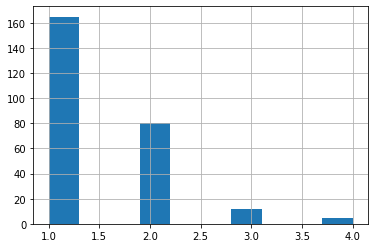

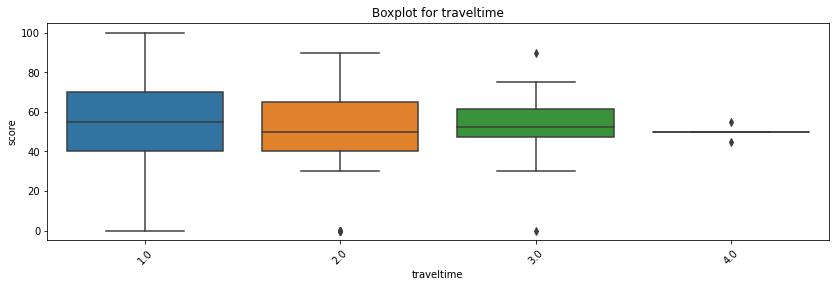

None
- Checking for correlation: -0.05
- For column traveltime we can see a very week inverse correlation.
- I decided to exclude traveltime table from the list.


In [26]:
# The next one is traveltime - travel inroute to\from
# the school
col = 'traveltime'

print('- Checking',col,'data of type',df[col].dtype,'...')
print(df[col].describe())

print(df[col].hist())

print(build_boxplot(col))

ncd = get_numeric_col_data(df[col])

# Checking for correlation coeficient
corrcoef = np.corrcoef(df.loc[df[col].between(ncd['m_0'],ncd['m_1'])]['score'],
                       df.loc[df[col].between(ncd['m_0'],ncd['m_1'])][col]
                      )

print('- Checking for correlation:', round(corrcoef[0,1],3))
print('- For column',col,'we can see a very week',
      'inverse correlation.')

print('- I decided to exclude traveltime table from the list.')

- Checking studytime data of type float64 ...
count    262.000000
mean       2.011450
std        0.850886
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


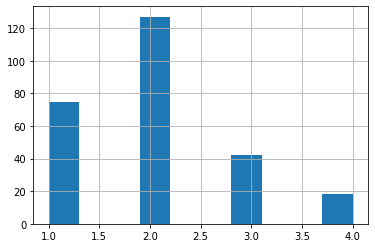

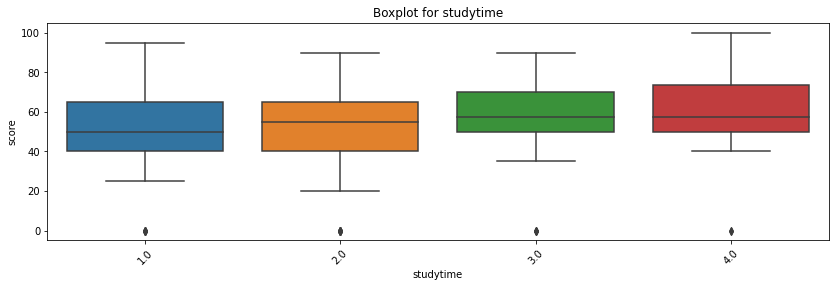

None
- Checking for correlation: -0.047
- For column studytime we can see a very week inverse correlation.
- I decided to exclude traveltime table from the list.


In [27]:
# The next one is studytime - off-school study
# time of the students.
col = 'studytime'

print('- Checking',col,'data of type',df[col].dtype,'...')
print(df[col].describe())

print(df[col].hist())

print(build_boxplot(col))

ncd = get_numeric_col_data(df[col])

# Checking for correlation coeficient
corrcoef = np.corrcoef(df.loc[df[col].between(ncd['m_0'],ncd['m_1'])]['score'],
                       df.loc[df[col].between(ncd['m_0'],ncd['m_1'])][col]
                      )

print('- Checking for correlation:', round(corrcoef[0,1],3))
print('- For column',col,'we can see a very week',
      'inverse correlation.')

print('- I decided to exclude studytime table from the list.')

- Checking failures data of type float64 ...
count    262.000000
mean       0.332061
std        0.743067
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


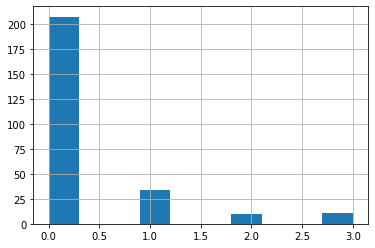

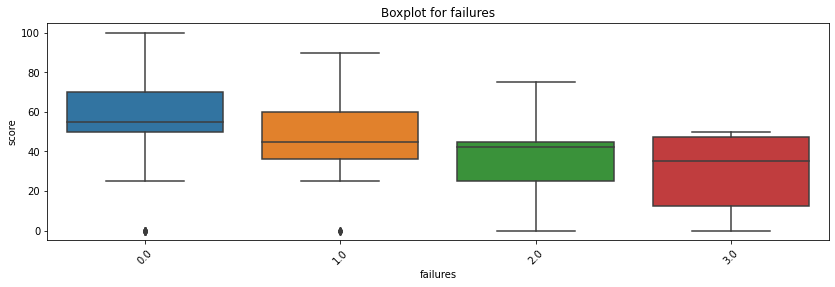

None
- I decided to exclude because almost all not 0 data will be among the outliers.


In [31]:
# The next one is failures - off-school failures.  
col = 'failures'

print('- Checking',col,'data of type',df[col].dtype,'...')
print(df[col].describe())

print(df[col].hist())

print(build_boxplot(col))

print('- I decided to exclude because almost all not 0 data',
      'will be among the outliers.')

- Checking goout data of type float64 ...
count    262.000000
mean       3.091603
std        1.078884
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


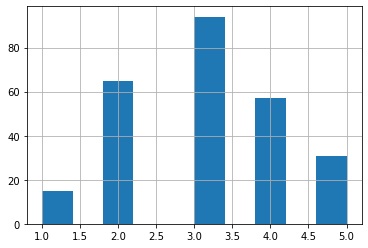

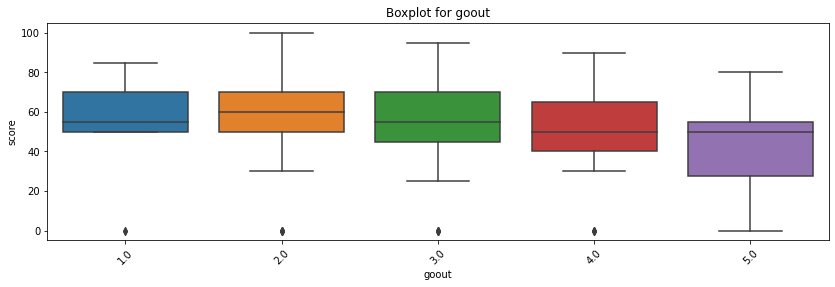

None
- Checking for correlation: -0.167
- For column goout we can see a distinct inverse correlation.
- Hypothesis: the more time kid spend with his friends - the less scores he gets.


In [35]:
# The next one is goout - time with friends.
col = 'goout'

print('- Checking',col,'data of type',df[col].dtype,'...')
print(df[col].describe())

print(df[col].hist())

print(build_boxplot(col))

ncd = get_numeric_col_data(df[col])

# Checking for correlation coeficient
corrcoef = np.corrcoef(df.loc[df[col].between(ncd['m_0'],ncd['m_1'])]['score'],
                       df.loc[df[col].between(ncd['m_0'],ncd['m_1'])][col]
                      )

print('- Checking for correlation:', round(corrcoef[0,1],3))
print('- For column',col,'we can see a distinct',
      'inverse correlation.')

print('- Hypothesis: the more time kid spend with his',
      'friends - the less scores he gets.')

- Checking health data of type float64 ...
count    262.000000
mean       3.435115
std        1.370735
min        1.000000
25%        2.250000
50%        3.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


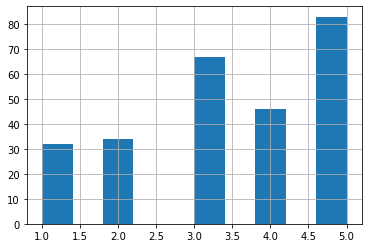

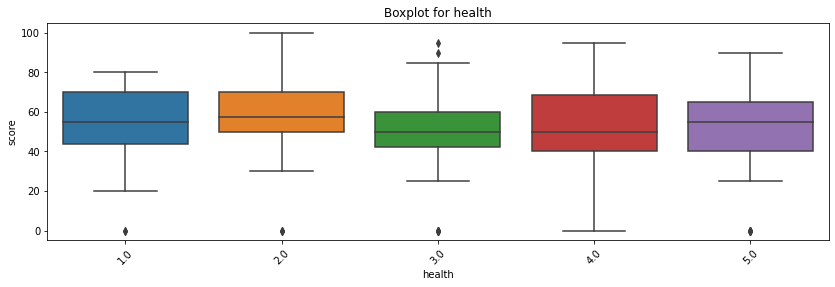

None
- Checking for correlation: -0.029
- For column health we can see a very weak inverse correlation.
- I will exclude the colum health from the list.


In [37]:
# The next one is health - student health status.
col = 'health'

print('- Checking',col,'data of type',df[col].dtype,'...')
print(df[col].describe())

print(df[col].hist())

print(build_boxplot(col))

ncd = get_numeric_col_data(df[col])

# Checking for correlation coeficient
corrcoef = np.corrcoef(df.loc[df[col].between(ncd['m_0'],ncd['m_1'])]['score'],
                       df.loc[df[col].between(ncd['m_0'],ncd['m_1'])][col]
                      )

print('- Checking for correlation:', round(corrcoef[0,1],3))
print('- For column',col,'we can see a very weak',
      'inverse correlation.')

print('- I will exclude the colum health from the list.')

- Checking absences data of type float64 ...
count    262.000000
mean       7.755725
std       27.591184
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


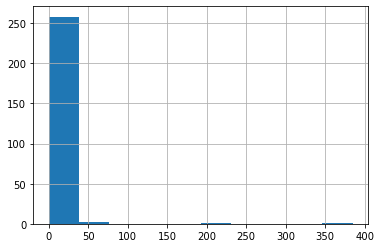

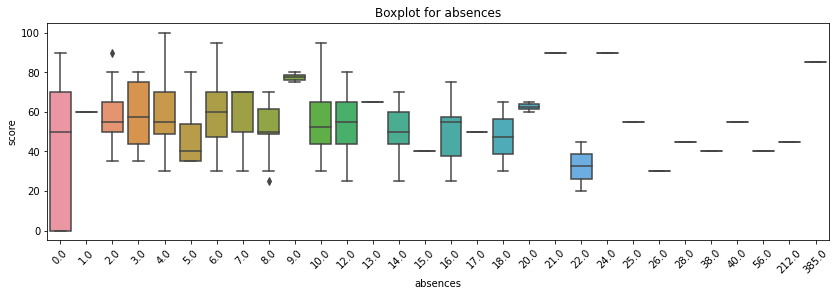

None
- Checking for correlation: 0.096
- For column absences we can see a distinct inverse correlation.
- Hypothesis: the more classes student are visited by the student - the higher scores he has.


In [40]:
# The next one is absences - quantity
# of lost lessons.  
col = 'absences'

print('- Checking',col,'data of type',df[col].dtype,'...')
print(df[col].describe())

print(df[col].hist())

print(build_boxplot(col))

ncd = get_numeric_col_data(df[col])

# Checking for correlation coeficient
corrcoef = np.corrcoef(df.loc[df[col].between(0,23)]['score'],
                       df.loc[df[col].between(0,23)][col]
                      )

print('- Checking for correlation:', round(corrcoef[0,1],3))
print('- For column',col,'we can see a distinct',
      'inverse correlation.')

print('- Hypothesis: the more classes student are visited',
      'by the student - the higher scores he has.')

As the conclusion:
The dataset has enough data.
Data quality is not so bad. 
Quite a lot of data is missing;